In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
df = pd.read_csv("/nfs_home/users/osvk/projects/tskit-ld/logs/compute_times/r2_array_method/compute_times.csv")
df = df.loc[df.groupby(['num_samples','method','max_sites','max_kb'])['time_taken_sec'].transform('max').eq(df['time_taken_sec'])].reset_index(drop=True)
df['params'] = df['method'] + ' (max. sites = ' + df['max_sites'].astype(str) + ')_' + df['max_kb'].astype(str) + 'kb'
df = df.drop(columns=['method', 'max_sites', 'max_kb'])
df = df.pivot(index='num_samples', columns='params', values='time_taken_sec').reset_index()
df

params,num_samples,plink (max. sites = 10)_200kb,plink (max. sites = 10)_500kb,plink (max. sites = 100)_200kb,plink (max. sites = 100)_500kb,plink (max. sites = 50)_200kb,plink (max. sites = 50)_500kb,plink (max. sites = 75)_200kb,plink (max. sites = 75)_500kb,tskit (max. sites = 10)_200kb,tskit (max. sites = 10)_500kb,tskit (max. sites = 100)_200kb,tskit (max. sites = 100)_500kb,tskit (max. sites = 50)_200kb,tskit (max. sites = 50)_500kb,tskit (max. sites = 75)_200kb,tskit (max. sites = 75)_500kb
0,10,0.113056,0.129613,0.560020,0.199702,0.504235,0.518680,0.415623,0.200929,0.159690,0.179574,0.527100,0.453230,0.324176,0.332563,0.502348,0.500679
1,100,0.431604,0.463171,0.298724,0.518428,0.510639,0.247705,0.246161,0.244398,0.298513,0.420058,0.991230,1.011370,0.978038,0.716220,0.752235,0.780210
2,1000,0.387362,0.547592,0.640064,0.601602,0.880665,0.750513,1.020567,1.043276,1.061446,0.828474,6.885276,6.827599,4.333785,2.266836,5.763165,5.712140
3,10000,1.863729,2.066908,4.423798,4.490345,4.594563,3.646464,6.126955,6.136794,5.258086,3.613530,27.811963,27.989265,15.702700,9.476398,23.064243,23.399485
4,25000,7.043656,5.924414,16.656806,15.377541,13.686738,9.801255,19.413482,12.780553,12.741205,7.840138,49.688163,29.055299,29.427986,19.409904,41.290979,22.943535
5,50000,17.349797,16.020224,46.778553,37.726609,27.364938,24.478668,49.459895,32.339709,23.709996,14.758526,75.737783,47.238407,48.458599,30.087171,65.601490,37.708395
6,75000,28.188906,23.901238,80.941850,65.709962,45.218437,42.992883,84.451468,53.604580,37.105755,22.495083,105.524345,62.893389,65.452717,38.875493,89.757984,51.215875
7,100000,38.751373,35.311876,128.060228,93.677294,64.570994,61.803088,127.632613,77.726771,50.704957,31.029927,132.741534,77.492999,107.197154,53.116032,116.302808,64.468937
8,250000,127.730359,121.996144,483.172350,322.822405,214.047573,215.542105,456.368491,267.373829,130.126625,88.628767,315.386942,174.291306,130.350741,130.516158,282.638952,150.693590


In [23]:
df200 = df.filter(regex='(num_samples|200kb)')
df500 = df.filter(regex='(num_samples|500kb)')
df200.columns = df200.columns.str.replace('_200kb', '')
df500.columns = df500.columns.str.replace('_500kb', '')
df200 = df200[['num_samples', 'plink (max. sites = 10)', 'plink (max. sites = 50)', 'plink (max. sites = 75)', 'plink (max. sites = 100)','tskit (max. sites = 10)', 'tskit (max. sites = 50)', 'tskit (max. sites = 75)', 'tskit (max. sites = 100)']]
df500 = df500[['num_samples', 'plink (max. sites = 10)', 'plink (max. sites = 50)', 'plink (max. sites = 75)', 'plink (max. sites = 100)','tskit (max. sites = 10)', 'tskit (max. sites = 50)', 'tskit (max. sites = 75)', 'tskit (max. sites = 100)']]
df500

params,num_samples,plink (max. sites = 10),plink (max. sites = 50),plink (max. sites = 75),plink (max. sites = 100),tskit (max. sites = 10),tskit (max. sites = 50),tskit (max. sites = 75),tskit (max. sites = 100)
0,10,0.129613,0.518680,0.200929,0.199702,0.179574,0.332563,0.500679,0.453230
1,100,0.463171,0.247705,0.244398,0.518428,0.420058,0.716220,0.780210,1.011370
2,1000,0.547592,0.750513,1.043276,0.601602,0.828474,2.266836,5.712140,6.827599
3,10000,2.066908,3.646464,6.136794,4.490345,3.613530,9.476398,23.399485,27.989265
4,25000,5.924414,9.801255,12.780553,15.377541,7.840138,19.409904,22.943535,29.055299
5,50000,16.020224,24.478668,32.339709,37.726609,14.758526,30.087171,37.708395,47.238407
6,75000,23.901238,42.992883,53.604580,65.709962,22.495083,38.875493,51.215875,62.893389
7,100000,35.311876,61.803088,77.726771,93.677294,31.029927,53.116032,64.468937,77.492999
8,250000,121.996144,215.542105,267.373829,322.822405,88.628767,130.516158,150.693590,174.291306


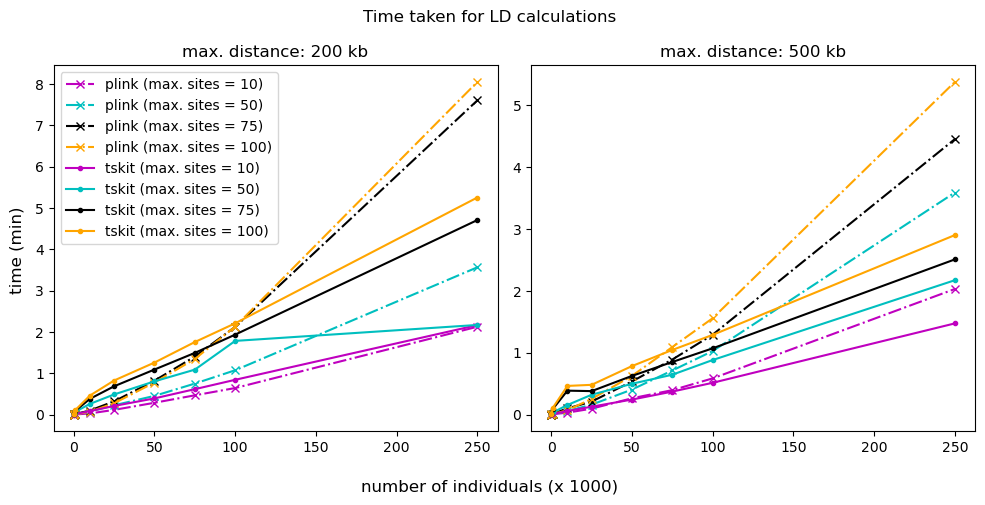

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
colours = ['m', 'c', 'k', 'orange', 'm', 'c', 'k', 'orange']
for i,col in enumerate(df200):
    if col != "num_samples":
        i=i-1
        if 'plink' in col:
            linestyle='-.'
            marker='x'
        if 'tskit' in col:
            linestyle='solid'
            marker='.'
        axes[0].plot(df200['num_samples']/1_000,df200[col]/60,label=col, marker=marker,linestyle=linestyle, c=colours[i])
for j,col in enumerate(df500):
    if col != "num_samples":
        j=j-1
        if 'plink' in col:
            linestyle='-.'
            marker='x'
        if 'tskit' in col:
            linestyle='solid'
            marker='.'
        axes[1].plot(df500['num_samples']/1_000,df500[col]/60,label=col, marker=marker,linestyle=linestyle, c=colours[j])
axes[0].legend()
#axes[1].legend()
fig.suptitle("Time taken for LD calculations")
axes[0].set_title("max. distance: 200 kb")
axes[1].set_title("max. distance: 500 kb")
fig.supxlabel('number of individuals (x 1000)')
fig.supylabel('time (min)')
fig.tight_layout()
plt.show()